# 正則化(Regularization)

[參考文章](https://allen108108.github.io/blog/2019/10/22/L1%20,%20L2%20Regularization%20%E5%88%B0%E5%BA%95%E6%AD%A3%E5%89%87%E5%8C%96%E4%BA%86%E4%BB%80%E9%BA%BC%20_/)

正則化是機器學習和統計中的一種技術，用於控制模型的複雜度，以<font size = 4 color = orange>避免過度擬合（過度訓練）和提升模型的泛化能力</font>, 但同時可能會導致模型在訓練數據上的性能下降。

正則化的方法是<font size = 4 color = orange>在模型的損失函數中加入額外的懲罰項</font>, 這些項通常是模型參數的絕對值或平方，根據不同的方法而定。

## 常見的正則化

* L1 正則化（Lasso 正則化）：通過將模型參數的絕對值添加到損失函數中，鼓勵某些特徵的係數變成零，實現特徵選擇，適用於稀疏特徵的情況。

    Loss = Original Loss + $\lambda\sum^{n}_{i+1}|w_i|$

* L2 正則化（Ridge 正則化）：通過將模型參數的平方和添加到損失函數中，使係數趨近於零但不會等於零，有效地減少模型參數的大小，有助於解決共線性問題。

    Loss = Original Loss + $\lambda\sum^{n}_{i+1}w_i^2$

* Elastic Net 正則化：結合了 L1 和 L2 正則化，同時考慮特徵選擇和參數收縮的效果。

    Loss = Original Loss + $\lambda(\alpha\sum^n_{i=1}|w_i| + (1-\alpha)\sum^n_{i=1}w_i^2) $

其中
* $\lambda$ 是正則化參數, 越大懲罰力度越大, <font size = 4 color = orange>並非越大或越小越好</font>
* $w_i$ 是模型第i個參數值
* $\alpha$ 是 Elastic Net 中 Lasso 和 Ridge 的比例.

以下圖片皆取自[此網站](https://allen108108.github.io/blog/2019/10/22/L1%20,%20L2%20Regularization%20%E5%88%B0%E5%BA%95%E6%AD%A3%E5%89%87%E5%8C%96%E4%BA%86%E4%BB%80%E9%BA%BC%20_/)

![圖片](https://i.imgur.com/3UV63nV.png)

<img src="https://i.imgur.com/aleM87M.jpg" width="50%" height="50%">

<img src="https://i.imgur.com/oxsSI4z.jpg" width="50%" height="50%">


### Lasso 例子

正則化也可以用來選擇參數, 說是正則化時 model 的係數為 0 比較正確.

In [13]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn') #設定背景


# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y
X, y = make_data(100)


alpha = 0 時, 選擇的features 為 : [1 2 3 4 5]
alpha = 1e-05 時, 選擇的features 為 : [1 2 3 4 5]
alpha = 0.001 時, 選擇的features 為 : [1 2 3 4]
alpha = 0.1 時, 選擇的features 為 : [1]


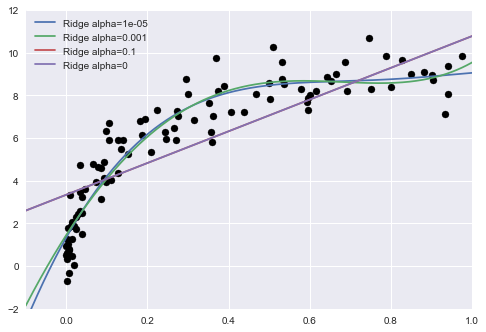

In [29]:
import warnings

# 忽略警告訊息
warnings.filterwarnings("ignore")

# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

degree = 5
alphas = np.logspace(-5, -1, 3, 10)  # 正則化強度參數

Poly3 = PolynomialFeatures(degree)
pre_x_train = Poly3.fit_transform(X)
LR = Lasso(alpha = 0)
LR.fit(pre_x_train,y)

pre_x_test = Poly3.fit_transform(x_test)
y_test = LR.predict(pre_x_test)
selected_features = np.where(LR.coef_ != 0)[0]
print(f'alpha = {0} 時, 選擇的features 為 : {selected_features}')
for alpha in alphas:
    Poly3 = PolynomialFeatures(degree)
    pre_x_train = Poly3.fit_transform(X)
    LR = Lasso(alpha = alpha)
    LR.fit(pre_x_train,y)

    pre_x_test = Poly3.fit_transform(x_test)
    y_test = LR.predict(pre_x_test)
    
    selected_features = np.where(LR.coef_ != 0)[0]
    print(f'alpha = {alpha} 時, 選擇的features 為 : {selected_features}')

    plt.plot(x_test.ravel(),y_test,label='Ridge alpha={}'.format(alpha))

plt.plot(x_test.ravel(),y_test,label='Ridge alpha={}'.format(0))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

### Ridge 例子

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn') #設定背景


# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y
X, y = make_data(100)


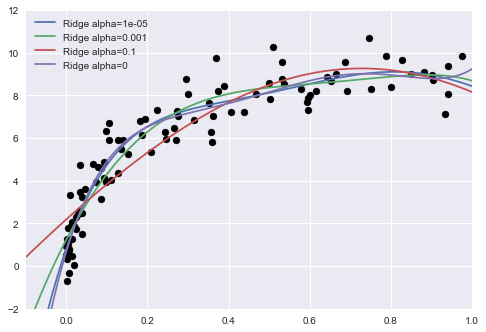

In [23]:
import warnings

# 忽略警告訊息
warnings.filterwarnings("ignore")

# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

degree = 5
alphas = np.logspace(-5, -1, 3, 10)  # 正則化強度參數
for alpha in alphas:
    Poly3 = PolynomialFeatures(degree)
    pre_x_train = Poly3.fit_transform(X)
    LR = Ridge(alpha = alpha)
    LR.fit(pre_x_train,y)

    pre_x_test = Poly3.fit_transform(x_test)
    y_test = LR.predict(pre_x_test)
    plt.plot(x_test.ravel(),y_test,label='Ridge alpha={}'.format(alpha))

Poly3 = PolynomialFeatures(degree)
pre_x_train = Poly3.fit_transform(X)
LR = Ridge(alpha = 0)
LR.fit(pre_x_train,y)

pre_x_test = Poly3.fit_transform(x_test)
y_test = LR.predict(pre_x_test)
plt.plot(x_test.ravel(),y_test,label='Ridge alpha={}'.format(0))

plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')